In [43]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans

from sklearn import metrics

from itertools import cycle

Reviewing 3 clustering methods, mean-shift, spectral clustering, and affinity propagation.

Data pre-normalized, but normally need to normalize data

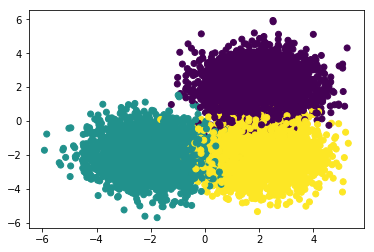

In [4]:
# Coordinates of blob centers
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a std of 1
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)



# Mean-shift

- Small to medium sized datasets only, slow
- Each cluster can be a unique shape (opposed to k-means only spherical)


In [6]:
# Set the bandwidth, this function automatically derives a bandwidth number
# based on an inspection of the distances among points in the data
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point
labels = ms.labels_

# Coordinates of the cluster centers
cluster_centers = ms.cluster_centers_

# Count our cluters
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 3


In [7]:
bandwidth

1.8126617424666345

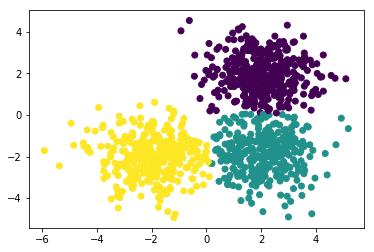

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [8]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, labels))

# Spectral Clustering
- Based on quantifying similarity between data points
- Defines similarity matrix nxn dimensions
- PCA on a similarity matrix rather than a covariance matrix
- Measures of similarity
    - Nearest neighbors
    Gaussian kernel of Euclidean distance (radial basis function, rbf)
    

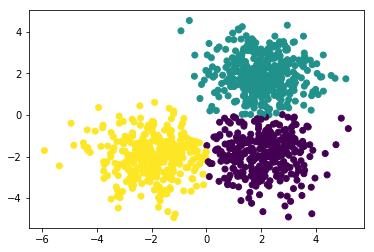

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        5  357    0
1        9    1  310
2      306    7    5


In [15]:
# Set number of clusters (we know it's 3)
n_clusters = 3

# Declare and fit the model
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

# Predicted clusters
predict = sc.fit_predict(X_train)

# Graph results
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, predict))

# Affinity Propagation
- Define exemplars for data points
- Tends to select more clusters than other methods
- Clusters can be uneven in size (unlike k-means)
- Can involve non-flat geometry
- Begins with nxn similarity matrix
- Clustering matrix c, 

Goal:
- Maximize net similarity
- 2 parameters, availability, sent from candidate exmplars to potential cluster members
- responsibility, quantify how well-suited the data point is to be a member of exemplar's cluster

- Not a fast algorithm
- time n^2 of input data, memory instensive


In [18]:
# Declare the model and fit
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Done
Estimated number of clusters: 93


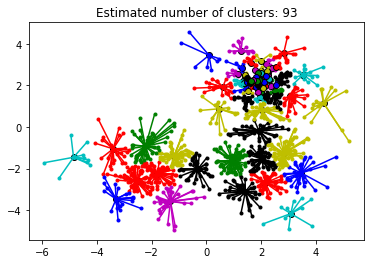

In [20]:
# Investigate what this number of clusters looks like

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the 
# exemplar and lines from the exemplar to each data point in the cluster
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1], 
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# Drill: More blobs, more problems?
Create more or fewer blobs, set blobs different distances apart.  Create at least 3 blob configurations, then run 4 methods on each one.  Discuss relative performance for different blob setups.

In [50]:
def k_means(n_clusters, X_train, y_train):
    # Calculate predicted values.
    y_pred = KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X_train)

    # Plot the solution.
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
    plt.show()

    # Check the solution against the data.
    print('Comparing k-means clusters against the data:')
    print(pd.crosstab(y_train, y_pred))

In [57]:
def mean_shift(X_train, y_train, bandwidth_quantile):
    # Set the bandwidth, this function automatically derives a bandwidth number
    # based on an inspection of the distances among points in the data
    bandwidth = estimate_bandwidth(X_train, 
                                   quantile=bandwidth_quantile, 
                                   n_samples=500)

    # Declare and fit the model
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(X_train)

    # Extract cluster assignments for each data point
    labels = ms.labels_

    # Coordinates of the cluster centers
    cluster_centers = ms.cluster_centers_

    # Count our cluters
    n_clusters_ = len(np.unique(labels))

    print("Number of estimated clusters: {}".format(n_clusters_))
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train, labels))

In [25]:
def spectral_shift(n_clusters, X_train, y_train):   
    # Declare and fit the model
    sc = SpectralClustering(n_clusters=n_clusters)
    sc.fit(X_train)

    # Predicted clusters
    predict = sc.fit_predict(X_train)

    # Graph results
    plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
    plt.show()

    print('Comparing the assigned categories to the ones in the data:')
    print(pd.crosstab(y_train, predict))

In [29]:
def affinity_propagation(X_train):
    # Declare the model and fit
    af = AffinityPropagation().fit(X_train)
    print('Done')

    # Pull the number of clusters and cluster assignments for each data point
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_

    print('Estimated number of clusters: {}'.format(n_clusters_))
    # Investigate what this number of clusters looks like

    plt.figure(1)
    plt.clf()

    # Cycle through each cluster and graph them with a center point for the 
    # exemplar and lines from the exemplar to each data point in the cluster
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X_train[cluster_centers_indices[k]]
        plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1], 
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
        for x in X_train[class_members]:
            plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()

## Blob configuration 1:
 4 blobs

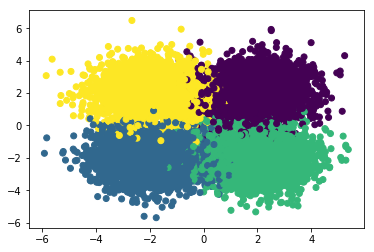

In [58]:
# Coordinates of blob centers
centers = [[2, 2], [-2, -2], [2, -2], [-2, 2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a std of 1
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)


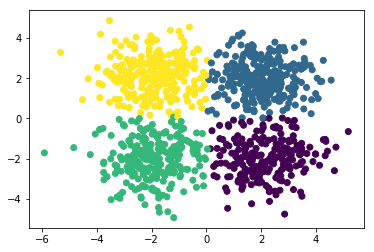

Comparing k-means clusters against the data:
col_0    0    1    2    3
row_0                    
0        5  260    0    8
1        6    0  228    5
2      226    3    9    0
3        0    2    7  241


In [59]:
k_means(4, X_train, y_train)

Number of estimated clusters: 4


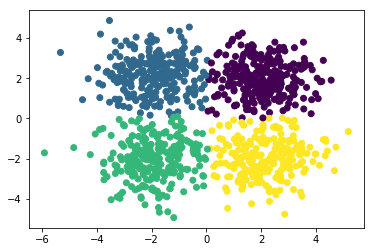

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0      260    8    0    5
1        0    5  228    6
2        3    0    9  226
3        2  240    8    0


In [60]:
mean_shift(X_train, y_train, bandwidth_quantile=0.2)

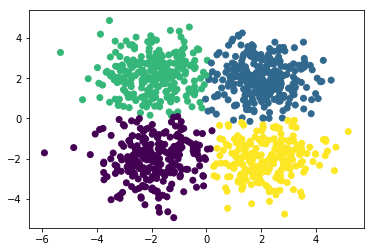

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0        0  263    8    2
1      228    0    5    6
2       11    5    0  222
3        8    3  239    0


In [61]:
spectral_shift(4, X_train, y_train)

Done
Estimated number of clusters: 25


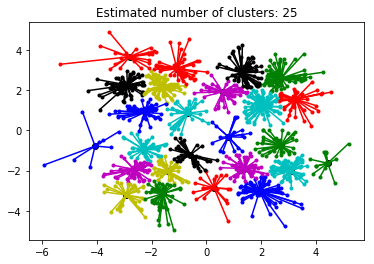

In [62]:
affinity_propagation(X_train)

# Blob Configuration 2:
- Assortment blobs and distances

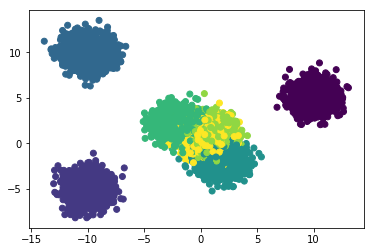

In [63]:
# Coordinates of blob centers
centers = [[10, 5], [-10, -5], [-10, 10], [2, -2], [-2, 2], [1, 1], [.5, .5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a std of 1
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

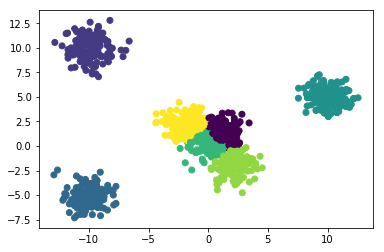

Comparing k-means clusters against the data:
col_0   0    1    2    3   4    5    6
row_0                                 
0       0    0    0  149   0    0    0
1       0    0  155    0   0    0    0
2       0  147    0    0   0    0    0
3       2    0    0    0  10  123    0
4       8    0    0    0  10    0  123
5      96    0    0    0  43    5    6
6      50    0    0    0  58    8    7


In [64]:
k_means(7, X_train, y_train)

Number of estimated clusters: 5


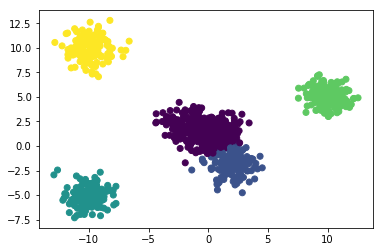

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0        0    0    0  149    0
1        0    0  155    0    0
2        0    0    0    0  147
3        7  128    0    0    0
4      141    0    0    0    0
5      138   12    0    0    0
6      108   15    0    0    0


In [65]:
mean_shift(X_train, y_train, bandwidth_quantile=0.1)

Number of estimated clusters: 7


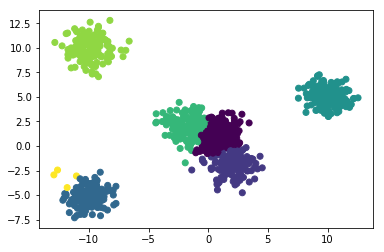

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4    5  6
row_0                                 
0        0    0    0  149    0    0  0
1        0    0  151    0    0    0  4
2        0    0    0    0    0  147  0
3        6  128    0    0    1    0  0
4       10    0    0    0  131    0  0
5      131    9    0    0   10    0  0
6       98   11    0    0   14    0  0


In [67]:
mean_shift(X_train, y_train, bandwidth_quantile=0.05)

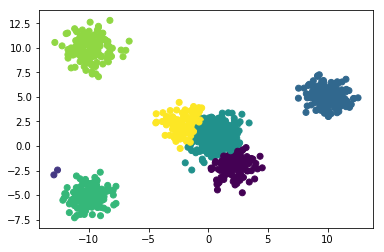

Comparing the assigned categories to the ones in the data:
col_0    0  1    2    3    4    5    6
row_0                                 
0        0  0  149    0    0    0    0
1        0  2    0    0  153    0    0
2        0  0    0    0    0  147    0
3      122  0    0   13    0    0    0
4        0  0    0   26    0    0  115
5        3  0    0  145    0    0    2
6        7  0    0  114    0    0    2


In [68]:
spectral_shift(7, X_train, y_train)

Done
Estimated number of clusters: 166


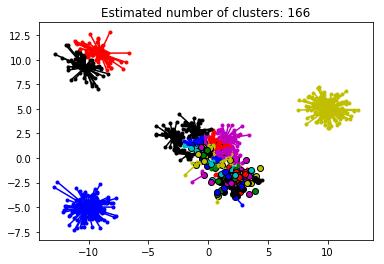

In [69]:
affinity_propagation(X_train)

# Blob 3:
- 8 close clusters

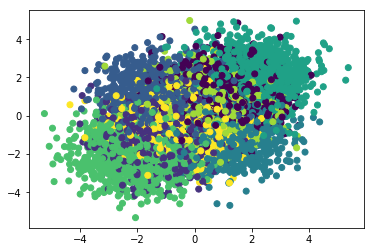

In [70]:
# Coordinates of blob centers
centers = [[1, 1], [-1, -1], [-1, 1], [1, -1], [2, 2], [-2, -2], [.5, .5], [-.5, -.5]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a std of 1
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    n_features=2,
    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# Divide into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

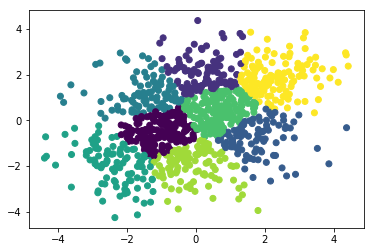

Comparing k-means clusters against the data:
col_0   0   1   2   3   4   5   6   7
row_0                                
0       2  30  18   8   0  54   0  26
1      56   0   3   7  29   9  31   0
2      26  27   0  58   0  15   2   1
3       7   1  53   0   1  14  32   2
4       0  21   3   1   0  13   0  86
5      18   0   1   1  67   1  26   0
6      17  27  12  10   0  54   6  14
7      39   1   7   9   5  27  21   1


In [72]:
k_means(8, X_train, y_train)

Number of estimated clusters: 10


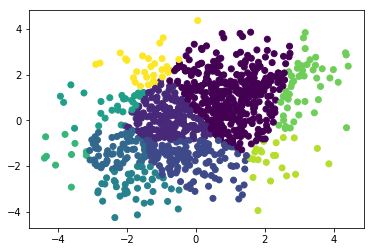

Comparing the assigned categories to the ones in the data:
col_0    0   1   2   3   4   5  6   7   8   9
row_0                                        
0      118  10   0   0   0   0  0   8   0   2
1        7  44  41  26  11   5  1   0   0   0
2       38  48   6   0   0  17  0   0   0  20
3       39   7  38   2   1   0  0   5  18   0
4       82   0   0   0   0   0  0  37   1   4
5        1   9  29  31  33   2  9   0   0   0
6       96  28   9   1   0   0  0   0   3   3
7       23  45  30   7   0   4  0   0   1   0


In [73]:
mean_shift(X_train, y_train, bandwidth_quantile=0.05)

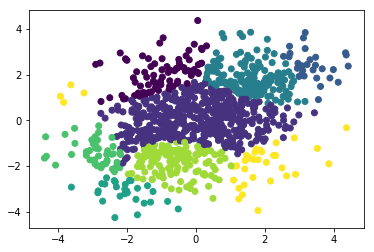

Comparing the assigned categories to the ones in the data:
col_0   0   1   2   3   4   5   6   7
row_0                                
0      12  81   2  43   0   0   0   0
1       1  71   0   0   4  11  45   3
2      50  70   0   5   0   0   3   1
3       0  57   0   3   0   1  24  25
4       7  17  28  71   0   0   0   1
5       0  18   0   0  24  32  40   0
6      10  93   0  29   0   0   6   2
7       3  75   0   1   0   3  24   4


In [74]:
spectral_shift(8, X_train, y_train)

Done
Estimated number of clusters: 36


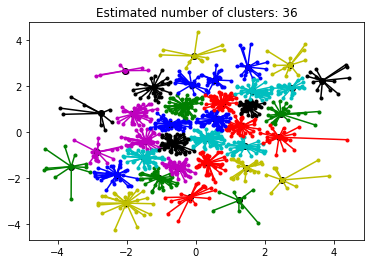

In [75]:
affinity_propagation(X_train)

# Summary:

In general, blobs that are further apart are better classified than ones that are close together.  

The bandwidth needed to be reduced for mean shift when the blobs were close together.  This also can generate false peaks.  In a dataset with centers close together and far apart, this created a false peak in the distant data points.

KMeans insists on spherical blobs.  Mean shift and spectral could create more unique shapes.
